In [ ]:
import seaborn as sns

### 1

In [ ]:
df_shape = "df has {} rows and {} columns".format(df.shape[0],df.shape[1])

### 2

In [ ]:
na_number = df.isna().sum() # создает серию сумм строк пропущенных значений

### 3

In [ ]:
df_types = df.dtypes

### 4

In [ ]:
df = df.astype({'age':'int'})

### 5

In [ ]:
df = df.drop(columns=['sex','age'])

### 6

In [ ]:
df = df.drop_duplicates(subset = 'client_id')

### 10

In [2]:
import pandas as pd

In [3]:
taxi = pd.read_csv('3_taxi_peru (1).csv',sep=';')

In [4]:
taxi['start_at'] = pd.to_datetime(taxi['start_at'])
taxi['end_at'] = pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] = pd.to_datetime(taxi['arrived_at'])
taxi = taxi.query('start_type == "asap" or start_type == "reserved"')

In [6]:
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).astype('timedelta64[m]')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


In [23]:
taxi1 = taxi.query("start_type == 'reserved' and wait_time > 0.0").groupby('driver_id').count().sort_values('journey_id',ascending=False)

In [25]:
taxi1.head(1)

,journey_id,user_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
driver_id,,,,,,,,,,,,,,,,,,,
406921adcca37705ef527b4246c0cfea,67,67,67,67,67,67,67,67,67,67,67,67,66,66,67,66,28,51,67


### 12

In [30]:
taxi['month'] = taxi['start_at'].dt.month
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

In [32]:
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday


### 13

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


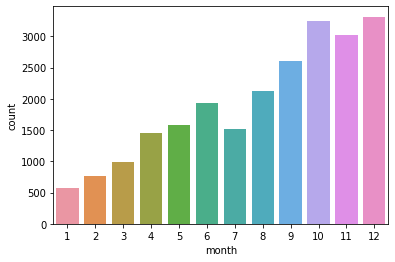

In [36]:
sns.countplot(taxi['month'])

### 14

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


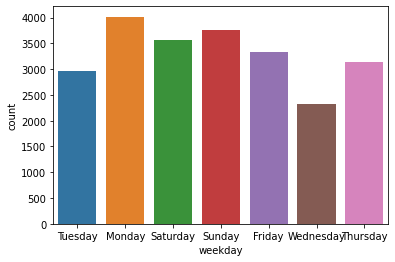

In [37]:
sns.countplot(taxi['weekday'])

### 15

In [42]:
mau = taxi.groupby('month',as_index=False).agg({'user_id':'nunique'})

In [48]:
mau

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


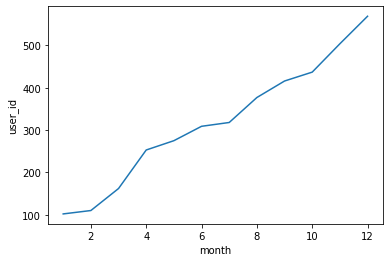

In [45]:
sns.lineplot(mau['month'],mau['user_id'])